## Lunch and Learn - Python Automation

### Import libraries

In [16]:
import pandas as pd
import datetime #To control dates
import numpy as np #Useful for arrays and functions
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline #To show graphs in Jupyter, Not necessary for Pycharm

from IPython.display import Image #In order to upload images to the notebook.

### Press Tab after a dot to see what the library contains

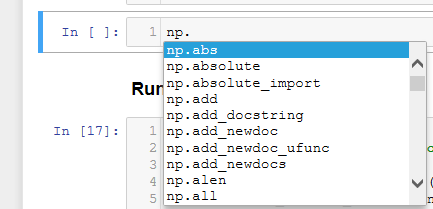

In [37]:
Image(filename='C:\Users\G53283\Desktop\Lunch & Learn\Tap example.png')

### When initializing function, put the cursor in the middle of the brackets and press Shift + Tab to get info

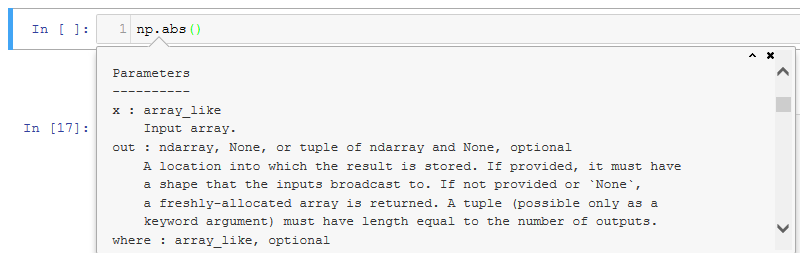

In [38]:
Image(filename='C:\Users\G53283\Desktop\Lunch & Learn\Inf.png')

### Run SQL

In [17]:
from marvin import marvin_cfg
from pandas.tseries.offsets import BDay

twp = marvin_cfg.get_connection('twp') #get connection to TWP
trmp = marvin_cfg.get_connection('trmp') #get connection to TRMP

Today = datetime.datetime.today().strftime("%d-%m-%y")
Yesterday_B = (datetime.datetime.today()-BDay(1)).strftime("%d-%m-%y")

#### Read SQL

In [18]:
df = pd.read_sql("""select fa_date, contract, strike, maturity, portfolio, data, vega, pl_vega, spread, bid, ask, mid, fa
from fcuser.ibcno_voltool_log 
where fa_date = TO_DATE('"""+Today+"""','DD/MM/YY')
and abs(PL_VEGA) >= 10000
and abs((mid- fa)) > 0.01
and abs((mid- fa)) / spread > 1
and data <> 'Parameterization'
and spread <> 0
""", trmp)

df

,fa_date,contract,strike,maturity,portfolio,data,vega,pl_vega,spread,bid,ask,mid,fa
0,2018-01-16,IYRUP19A80,80,43483,SEDT DEVON,Market data,32873.507086,50046.142989,0.00909,0.143785,0.152875,0.14833,0.133106


#### Save SQL result to Excel sheet

In [20]:
df.to_excel(r'H:\My documents\EXAMPLE.xlsx') #write the dataframe to excel
df.to_csv(r'H:\My documents\EXAMPLE.csv') #write the dataframe to csv

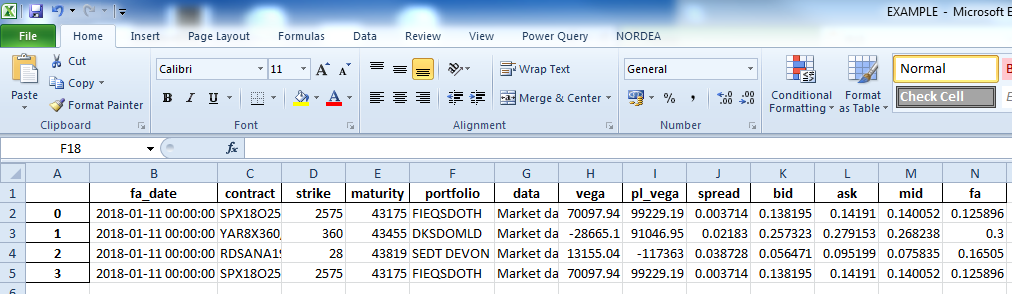

In [50]:
Image(filename='C:\Users\G53283\Desktop\Lunch & Learn\Excel example.png')

#### Read the Saved result into Python from your csv and excel file

In [22]:
df1 = pd.read_excel(r'H:\My documents\EXAMPLE.xlsx') #write the dataframe to excel
df2 = pd.read_csv(r'H:\My documents\EXAMPLE.csv') #write the dataframe to csv

In [23]:
df1

,fa_date,contract,strike,maturity,portfolio,data,vega,pl_vega,spread,bid,ask,mid,fa
0,2018-01-16,IYRUP19A80,80,43483,SEDT DEVON,Market data,32873.507086,50046.142989,0.00909,0.143785,0.152875,0.14833,0.133106


#### Execute a SQL script

In [17]:
twp.execute("""DECLARE       
     P_DATE DATE;       
     P_GLOGON VARCHAR2(200);    
     BEGIN       
     P_DATE := TO_DATE('"""+Yesterday_B+"""','DD/MM/YY');
     P_GLOGON := 'G53283';       
     IPV.PKG_IPV_EQUITY.load_equity_t1 (  P_DATE => P_DATE,P_GLOGON => P_GLOGON) ;  
     END;""")

### Interact with other programs

In [26]:
import win32com.client as win32
from win32com.client import Dispatch
import pyautogui
import time

shell = win32.Dispatch("WScript.Shell") #Open Shell
shell.Run("notepad") #Open Notepad
time.sleep(2)
shell.AppActivate("Notepad") #Run Notepad

True

#### Open Google Chrome

In [110]:
shell = win32.Dispatch("WScript.Shell") #Open Shell
shell.Run("Chrome") #Open Chrome
time.sleep(1) #Sleep in order to get the computer to catch up
shell.AppActivate("Chrome") #Activate Chrome

True

#### Use win32 to send keys and pyautogui to control mouse and type string

In [111]:
shell = win32.Dispatch("WScript.Shell") #Open Shell
shell.Run("Chrome") #Open Chrome
time.sleep(1) #Sleep in order to get the computer to catch up
shell.AppActivate("Chrome") #Activate Chrome

win = pyautogui.getWindow('Chrome') #Get Chrome window
win.maximize() #Maximize
win.move(0, 0) #Move to corner
win.set_foreground() #Maximize

time.sleep(0.5)
pyautogui.moveTo(382, 51) #Move mouse
time.sleep(0.5)
pyautogui.click() #Click Mouse
time.sleep(0.5)
shell.SendKeys("^a", 0) #Select all -> Ctrl + A
time.sleep(0.5)
shell.SendKeys("{DEL}", 0) #Delete
time.sleep(0.5)
pyautogui.typewrite("http://www.nordea.se/privat/sparande/fonder/fondutbud.html") #Type into browser
time.sleep(1)
shell.SendKeys("{ENTER}") #Press Enter

#### Might be better way due to you can control while shell is Busy

In [114]:
import win32api 

shell = win32.Dispatch("InternetExplorer.Application") #Open Shell
shell.Visible = 1
shell.FullScreen = 0
shell.Navigate('http://www.nordea.se/privat/sparande/fonder/fondutbud.html')

while shell.Busy == True:
    win32api.Sleep(100)

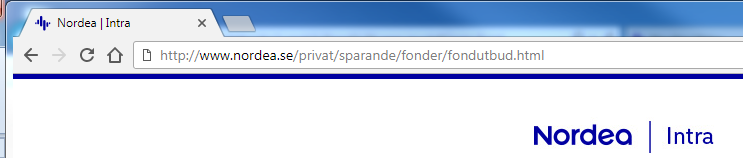

In [60]:
Image(filename='C:\Users\G53283\Desktop\Lunch & Learn\Chrome example.png')

#### Open Excel

In [41]:
shell.Run("Excel")
time.sleep(1) #Sleep in order to get the computer to catch up
shell.AppActivate("Excel") #Activate Chrome
win = pyautogui.getWindow('Excel') #Get window
win.maximize() #Maximize
win.move(0, 0) #Move to corner
win.set_foreground()

#### Open Excel files with Ctrl + O by using Sendkeys when the excel sheet is open

In [42]:
win = pyautogui.getWindow('Excel') #Get window
win.maximize() #Maximize
win.move(0, 0) #Move to corner
win.set_foreground()
time.sleep(5) #In order to get Excel to start
shell.SendKeys("^o", 0) #Ctrl Open

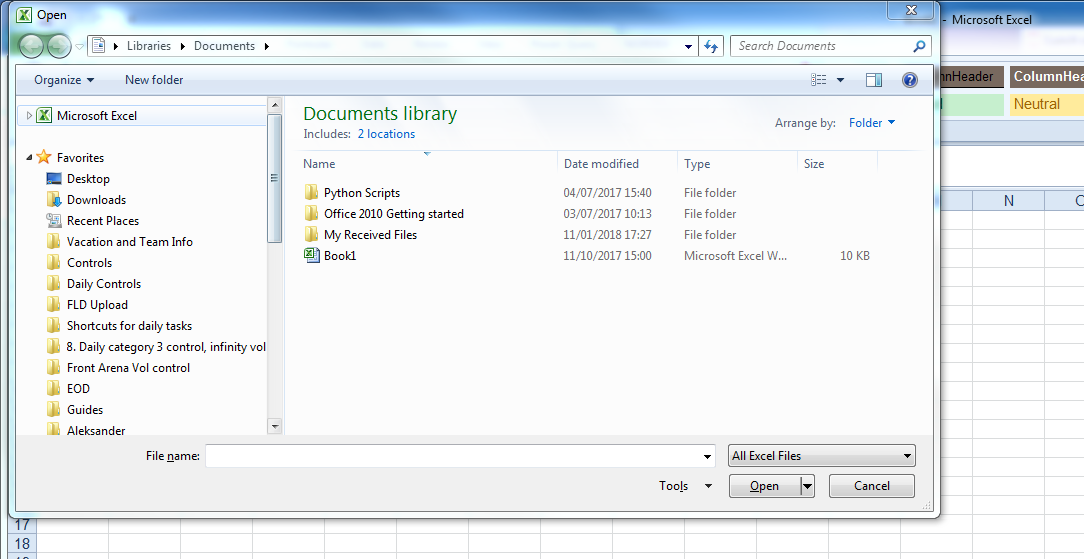

In [43]:
Image(filename='C:\Users\G53283\Desktop\Lunch & Learn\open.png')

### Interact with Excel

In [68]:
import openpyxl

wb = openpyxl.load_workbook(r'H:\Book1.xlsx') #load workbook
ws = wb.active #active it

ws['A1'].value = 200
ws['A2'].value = 300
ws['A3'].value = '=SUM(A1:A2)'

wb.save(r'H:\Book1.xlsx')  #remember to save the changes

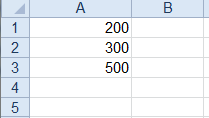

In [35]:
Image(filename='C:\Users\G53283\Desktop\Lunch & Learn\Excel cal.png')

In [70]:
#Store excel value into python variable

wb = openpyxl.load_workbook(r'H:\Book1.xlsx') #load workbook
ws = wb.active

result = ws['A1'].value

print(result)

200


### Refresh Excel Sheet without seeing eg. Visible = 0

In [58]:
import win32com.client

Application = win32com.client.Dispatch("Excel.Application")
Application.Visible = 0 #Set to 1 if you want to see the sheet - like VBAs screen updating

Workbook = Application.Workbooks.Open(r'H:\Book1.xlsx')
Workbook.RefreshAll()
Workbook.Save()

Application.Quit()

### Write VBA Code From Python

In [10]:
from win32com.client import DispatchEx

vba =  """
Sub Hello()

Range("A1:A2").value = 1

End Sub
"""

xl = DispatchEx('Excel.Application')
wb = xl.Workbooks.Add('H:\Book1.xlsx')

mod = wb.VBProject.VBComponents.Add(1)
mod.CodeModule.AddFromString(vba)

xl.Run('Hello')
wb.SaveAs('H:\Book1111.xlsm',FileFormat=52)
xl.Quit()

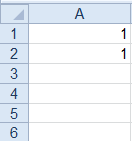

In [13]:
Image(filename='C:\Users\G53283\Desktop\Lunch & Learn\VBA example.png')

### Run VBA Code From Python

In [95]:
import xlwings
wb = xlwings.Book('Q:\$PC_Global_Rates\RPO & MD\Market Data\Valuation\Daily Controls\FLD Upload\FLD macro.xlsm')
macro = wb.macro('sbDelete_Rows_IF_Cell_Is_Blank') #name of the macro
macro.run()

### Display or Send Email

In [68]:
import win32com.client as win32

outlook = win32.Dispatch('outlook.application') #open outlook
mail = outlook.CreateItem(0) #create new mail
mail.To = 'm.karlsson@nordea.com'
mail.Cc = 'PC GR Curves'
mail.Subject = 'Equity T+1'
mail.HTMLBody = 'Hello Martin'
mail.display()

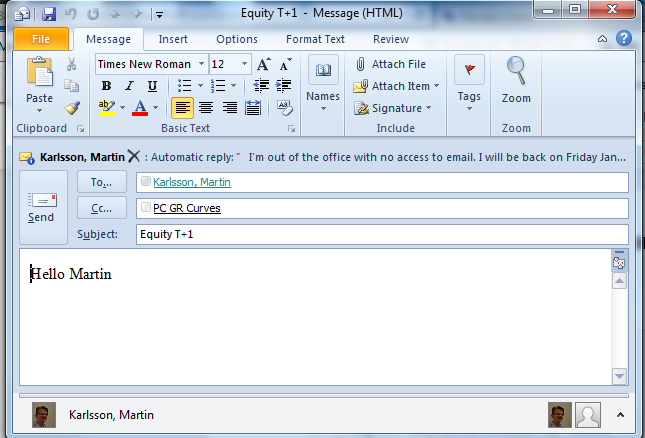

In [9]:
Image(filename='C:\Users\G53283\Desktop\Lunch & Learn\Email example.png')

In [39]:
outlook = win32.Dispatch('outlook.application')
mail = outlook.CreateItem(0)
mail.To = 'm.karlsson@nordea.com'
mail.Cc = 'PC GR Curves'
mail.Subject = 'Equity T+1 '+Yesterday_B
mail.HTMLBody = """\
<html>
  <head></head>
  <body>
    <p>Hi,<br>
    <br>
       The following equities breached the EUR 50,000 threshold in terms of IPV variance:<br>
       <br>
    </p>
  </body>
</html>
"""
mail.HTMLBody += df.to_html(na_rep = "", index = False).replace('<th>','<th style = "background-color: navy; font-size:10pt;">').replace('<tbody>', '<tbody style = "font-size:10pt; text-align: center;">')                                                              
mail.display()

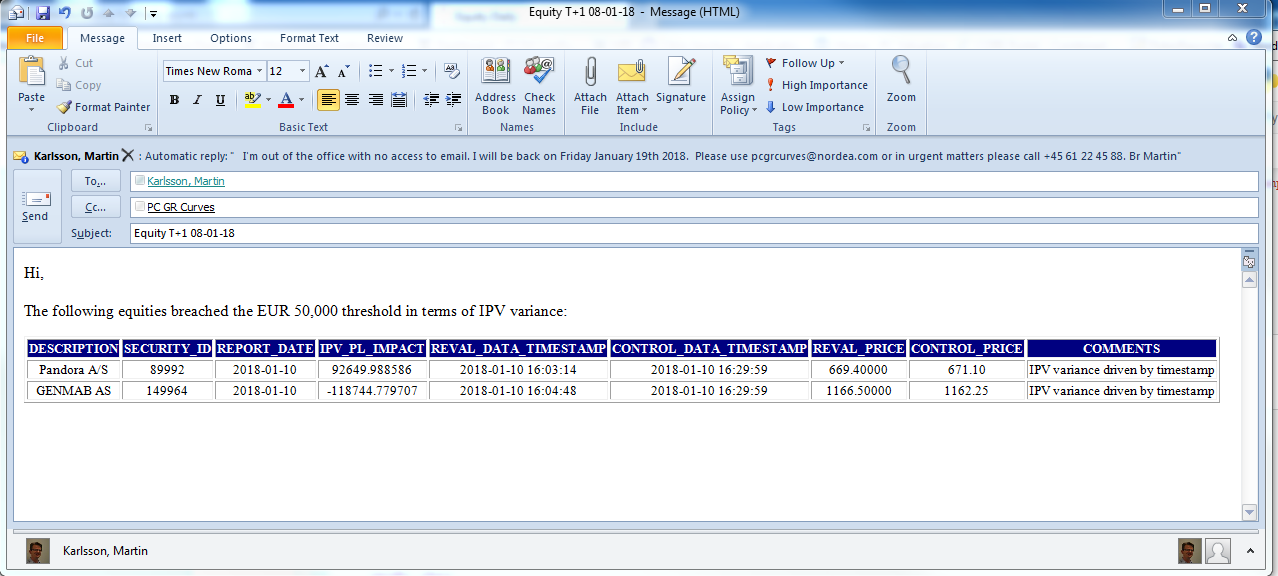

In [11]:
Image(filename='C:\Users\G53283\Desktop\Lunch & Learn\Email example 2.png')

# Other

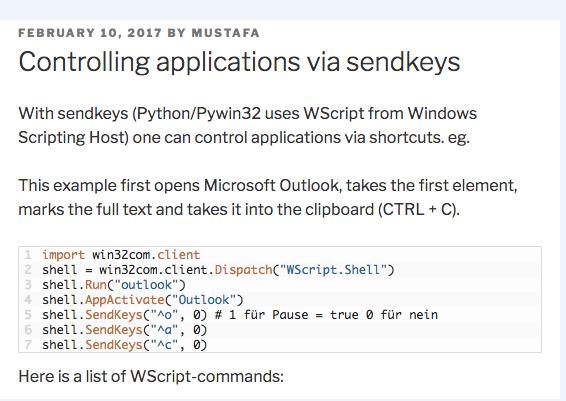

In [59]:
Image(filename='C:\Users\G53283\Desktop\Lunch & Learn\Keys.png')

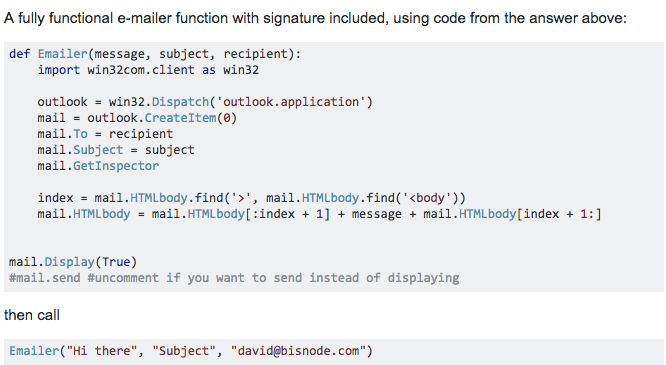

In [60]:
Image(filename='C:\Users\G53283\Desktop\Lunch & Learn\e function.png')

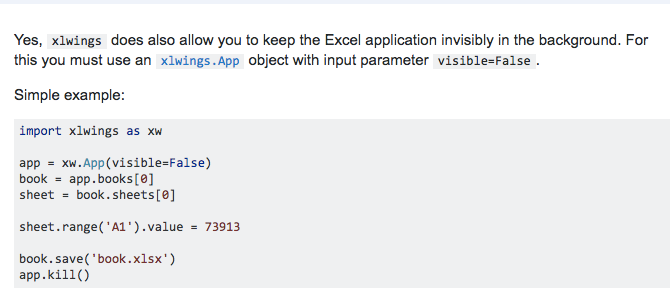

In [77]:
Image(filename='C:\Users\G53283\Desktop\Lunch & Learn\wings.png')

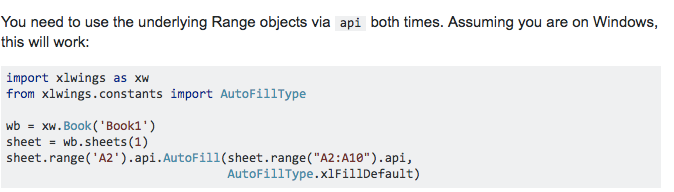

In [81]:
Image(filename=r'C:\Users\G53283\Desktop\Lunch & Learn\fill.png')

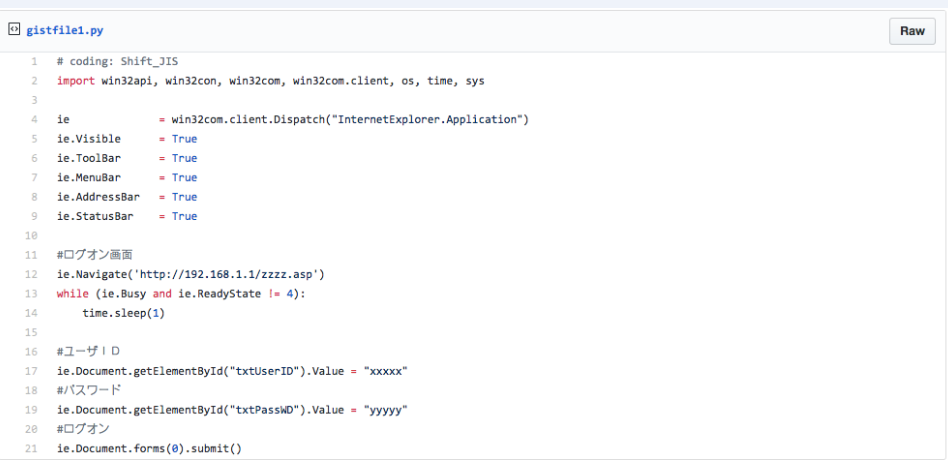

In [115]:
Image(filename=r'C:\Users\G53283\Desktop\Lunch & Learn\scrape.png')

In [87]:
http://pythonexcels.com/python-excel-mini-cookbook/